# 전처리()

In [ ]:
# import json

# # split = 'train' , 'val' , 'test'
# data_path = '/home/elicer/data/ALL/jsonl'

# def load_meeting_data(data_path, split):
#     """
#     JSONL 형식의 회의 데이터를 로드하는 함수

#     Args:
#         data_dir (str): 데이터 파일이 저장된 디렉토리 경로
#         split (str): 로드할 데이터셋 종류 ('train', 'val', 'test')

#     Returns:
#         list: JSONL 데이터가 파싱된 리스트
#     """
#     data_path = f"{data_path}/{split}.jsonl"  # 경로 동적으로 생성
#     data = []
    
#     # JSONL 파일 로드
#     with open(data_path, "r", encoding="utf-8") as f:
#         for line in f:
#             data.append(json.loads(line))

#     # 데이터셋 개수 출력
#     print(f"✅ Loaded {len(data)} meetings in the '{split}' dataset.")
#     return data

# data_train = load_meeting_data(data_path, 'train')
# data_val = load_meeting_data(data_path, 'val')
# data_test = load_meeting_data(data_path, 'test')
# print(data_train[0])
# print(data_val[0])
# print(data_test[0])


✅ Loaded 162 meetings in the 'train' dataset.
✅ Loaded 35 meetings in the 'val' dataset.
✅ Loaded 35 meetings in the 'test' dataset.
{'topic_list': [{'topic': 'Remote control prototype introduction', 'relevant_text_span': [['0', '53']]}, {'topic': 'Product evaluation discussion', 'relevant_text_span': [['54', '283']]}, {'topic': 'Product cost discussion', 'relevant_text_span': [['284', '459']]}, {'topic': 'Project and overall process review', 'relevant_text_span': [['460', '505']]}], 'general_query_list': [{'query': 'Summarize the whole meeting.', 'answer': "Firstly, Project Manager reviewed the overall process that the team designed the remote control that they had viewed the fashion trends and incorporated the key features. After that, User Interface introduced the prototype of remote control based on the previous discussion of its function. The prototype was yellow like a banana with a simplest quick on-off button and could be used both-handed. Secondly, Marketing designed an evalua

In [ ]:
# import re

# # 말버릇, 중간 감탄사 등 제거할 stopwords 리스트
# stopwords = ['-',
#     'ok', 'okay', 'yeah', 'yup', 'great', 'mm', 'mm-hmm','mmhmm', 'uh', 'uhm', 'um',
#     'hmm', 'huh', 'oh', 'alright', 'so', 'right', 'like', 'well', 'you know',
#     'i mean', 'sort of', 'kind of', 'actually', 'basically', 'literally',
#     'seriously', 'now then', 'anyway',
#      # 감탄사 및 일상적인 표현
#     'ah', 'uhhuh','uh-huh', 'uh-uh', 'ooh', 'aah', 'yay', 'whoa', 'wow',
#     'woo', 'eh', 'oh well', 'just saying', 'you see', 'by the way', 'honestly',
    
#     # 강조 및 전환어
#     'seriously', 'really', 'totally', 'kinda', 'sorta', 
#     'pretty much', 'quite', 'exactly', 'essentially', 'clearly', 'absolutely', 'definitely', 'in fact',
# ]

# stopwords_regex = r'\b(' + '|'.join(re.escape(word) for word in stopwords) + r')\b'

# # filter some noises caused by speech recognition
# def clean_data(text) :
#     text = re.sub(r'\{[^}]*\}', '', text)  # {vocalsound}, {gap}, {pause} 등 제거
#     text = re.sub(stopwords_regex, '', text, flags=re.IGNORECASE)
#     text = re.sub(r'\s+', ' ', text).strip() # 중복 공백 제거
#     text = re.sub(r'\b(\w+)\s+\1\b', r'\1', text) # 반복 단어 제거 ("we we", "the the" 등)
#     text = re.sub(r'(\w)_+', r'\1', text)  # 예: "L_C_D_" → "LCD", "a_m_i_" → "ami"

#     return text

In [3]:
# !pip install transformers

In [4]:
# !pip install transformers

In [ ]:
# from transformers import LongT5ForConditionalGeneration, AutoTokenizer

# tokenizer = AutoTokenizer.from_pretrained("google/long-t5-tglobal-base")

# def tokenize(sent):
#     tokens = tokenizer.tokenize(sent.lower())
#     return ' '.join(tokens)

/home/elicer/myenv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# def create_data(data, tokenizer, max_src_length , max_tgt_length):
#     """
#     회의록 데이터 데이터셋 변환

#     Args:
#         data (list): 회의록 데이터 리스트
#         tokenizer: 토크나이저 객체
#         max_src_length (int): 입력(회의록 본문) 최대 길이
#         max_tgt_length (int): 출력(요약) 최대 길이

#     Returns:
#         list: { "src": input_text, "tgt": target_text } 구조의 학습 데이터
#     """
#     temp_data = []

#     for meeting in data:
#         # 전체 회의록 구성
#         src = []
#         for transcript in meeting['meeting_transcripts']:
#             cur_turn = transcript['speaker'].lower() + ': '
#             cur_turn += clean_data(transcript['content'])  # 노이즈 필터 적용
#             src.append(cur_turn)
        
#         # 하나의 긴 텍스트로 변환
#         src_text = ' '.join(src)

#         # 길이 제한 적용
#         src_ids = tokenizer.encode(src_text, truncation=True, max_length=max_src_length)
#         src_text = tokenizer.decode(src_ids, skip_special_tokens=True)

#         # General Query 리스트 처리
#         for query_data in meeting['general_query_list']:
#             cur = {}
#             query = clean_data(query_data['query'])  # 질문 정제
#             target = clean_data(query_data['answer'])  # 답변 정제

#             # 입력 형식: "<s> 질문 </s> 회의록 본문 </s>"
#             input_text = f"<s> {query} </s> {src_text} </s>"
#             input_ids = tokenizer.encode(input_text, truncation=True, max_length=max_src_length)
#             input_text = tokenizer.decode(input_ids, skip_special_tokens=True)

#             target_ids = tokenizer.encode(target, truncation=True, max_length=max_tgt_length)
#             target_text = tokenizer.decode(target_ids, skip_special_tokens=True)

#             cur['src'] = input_text
#             cur['tgt'] = target_text
#             temp_data.append(cur)

#     return temp_data
# my_data_train = create_data(data_train, tokenizer, max_src_length=4096, max_tgt_length=1024)
# my_data_val = create_data(data_val, tokenizer, max_src_length=4096, max_tgt_length=1024)
# my_data_test = create_data(data_test, tokenizer, max_src_length=4096, max_tgt_length=1024)

# print(my_data_train[0])
# print(my_data_val[0])
# print(my_data_test[0])

In [ ]:
# !pip install datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 29.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0


In [ ]:
# from datasets import Dataset

# def convert_to_dataset(data):
#     dataset_dict = {
#         "src": [item["src"] for item in data],
#         "tgt": [item["tgt"] for item in data]
#     }
#     return Dataset.from_dict(dataset_dict)
# mydata_train = convert_to_dataset(my_data_train)
# mydata_val = convert_to_dataset(my_data_val)
# mydata_test = convert_to_dataset(my_data_test)

# print(mydata_train)
# print(mydata_val)
# print(mydata_test)

Dataset({
    features: ['src', 'tgt'],
    num_rows: 162
})
Dataset({
    features: ['src', 'tgt'],
    num_rows: 35
})
Dataset({
    features: ['src', 'tgt'],
    num_rows: 37
})


In [ ]:
# print(my_data_train[0])  # 첫 번째 데이터 확인
# print(mydata_train[0])  # 첫 번째 데이터 확인


{'src': "s> Summarize the whole meeting. project manager: Yep . Soon as I get this . . This is our last meeting . I'll go ahead and go through the minutes from the previous meeting . and then we'll have a , the prototype presentation . then we will do an evaluation . or we'll see what , what we need to have under the criteria for the evaluation . Then we'll go through the finance and see if we fall within the budget . then we'll do the evaluation , and then we can finish up after that with any changes that we'll need to make , or hopefully everything will fall in line . let's see , minutes from the last meeting . we looked at the trends . We had the fashion trends that people want a fancy lookandfeel . It was twice as important as anything else . they liked fruit and vegetables in the new styles . and a spongy feel . we were talking about trying to incorporate those into our prototype . they wanted limited buttons and simplicity . then we looked at the method for coming up with our own

In [ ]:
# mydata_train['tgt'][0]

"Firstly, Project Manager reviewed the overall process that the team designed the remote control that they had viewed the fashion trends and incorporated the key features. After that, User Interface introduced the prototype of remote control based on the previous discussion of its function. The prototype was yellow a banana with a simplest quick onoff button and could be used bothhanded. Secondly, Marketing designed an evaluation test according to criteria found of the market trend as the customers' complaints and the team gave one to seven points to the shape, colour, material, controls and functions of the product. Thirdly, the team found that the current product exceeded the budget, the team decided to completely discard the single button and LCD. Lastly, the team gave positive feedback on the project and the process."

In [ ]:
# !pip install torch
# !pip install datasets

In [ ]:
# import torch
# from torch.optim import AdamW
# from torch.utils.data import DataLoader
# from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
# from datasets import load_dataset

In [ ]:
# # gpu a100
# !pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

In [ ]:
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# MODEL_NAME = "google/long-t5-tglobal-base"

# # 토크나이저 로드
# tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# # Long-T5 모델 로드
# # device_map="auto" 등을 쓰지 않고, 단일 디바이스에 올리는 예시
# model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)
# model.to(device)

# # 학습에 사용할 Optimizer 설정
# optimizer = AdamW(model.parameters(), lr=1e-5, weight_decay=0.01)

In [ ]:
# def preprocess_function(examples):
#     inputs = examples["src"]
#     targets = examples["tgt"]

#     # 입력 데이터 토크나이징 (padding=False로 두거나 완전히 제거)
#     model_inputs = tokenizer(
#         inputs,
#         max_length=4096,
#         truncation=True,
#         padding="longest",       # 또는 padding=None (기본값)
#     )

#     # 타겟 데이터 토크나이징
#     labels = tokenizer(
#         targets,
#         max_length=1024,
#         truncation=True,
#         padding="longest",       # 여기서도
#     )

#     model_inputs["labels"] = labels["input_ids"]
#     return model_inputs

# tokenized_train = mydata_train.map(preprocess_function, batched=True, batch_size=1)
# tokenized_val   = mydata_val.map(preprocess_function,   batched=True, batch_size=1)
# tokenized_test  = mydata_test.map(preprocess_function,  batched=True, batch_size=1)

Map:   0%|          | 0/162 [00:00<?, ? examples/s]

Map: 100%|██████████| 37/37 [00:00<00:00, 70.79 examples/s]


In [ ]:
# tokenized_train.set_format("torch", columns=["input_ids","attention_mask","labels"])
# tokenized_val.set_format("torch", columns=["input_ids","attention_mask","labels"])
# tokenized_test.set_format("torch", columns=["input_ids","attention_mask","labels"])


In [ ]:
# from torch.utils.data import DataLoader

# train_loader = DataLoader(tokenized_train, batch_size=1, shuffle=True)
# val_loader   = DataLoader(tokenized_val, batch_size=1)

In [ ]:
# print(type(mydata_test))  # 정상적으로 작동하면 <class 'list'>이어야 함
# print(type(mydata_test[0]))  # <class 'dict'>이어야 함

<class 'datasets.arrow_dataset.Dataset'>
<class 'dict'>


In [ ]:
# from datasets import Dataset

# # Dataset을 리스트로 변환
# if isinstance(mydata_test, Dataset):
#     mydata_test = mydata_test.to_list()

# # 변환 후 타입 확인
# print(type(mydata_test))  # <class 'list'>이어야 정상
# print(type(mydata_test[0]))  # <class 'dict'>이어야 정상

<class 'list'>
<class 'dict'>


In [ ]:
# from transformers import DataCollatorForSeq2Seq

# # 데이터 콜레이터 정의
# data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

# # DataLoader 생성 (collate_fn 추가)
# train_loader = DataLoader(tokenized_train, batch_size=2, shuffle=True, collate_fn=data_collator)
# val_loader   = DataLoader(tokenized_val, batch_size=2, collate_fn=data_collator)

In [ ]:
# def evaluate(model, val_loader):
#     model.eval()
#     total_loss = 0
#     with torch.no_grad():
#         for batch in val_loader:
#             input_ids      = batch["input_ids"].to(device)
#             attention_mask = batch["attention_mask"].to(device)
#             labels         = batch["labels"].to(device)

#             outputs = model(
#                 input_ids=input_ids,
#                 attention_mask=attention_mask,
#                 labels=labels
#             )
#             total_loss += outputs.loss.item()

#     avg_val_loss = total_loss / len(val_loader)
#     return avg_val_loss

In [ ]:
# epochs = 50
# early_stopping_patience = 5
# best_loss = float("inf")
# patience_counter = 0

# max_steps = 500
# # gradient checkpointing은 학습 전에 한 번만 설정
# # model.gradient_checkpointing_enable()

# train_losses = []
# val_losses = []

# for epoch in range(epochs):
#     model.train()
#     epoch_loss = 0
#     for step, batch in enumerate(train_loader):
#         # 테스트용 스텝 제한 적용 (필요한 경우)
#         if step >= max_steps:
#             break
#         optimizer.zero_grad()

#         outputs = model(
#             input_ids=batch["input_ids"].to(device),
#             attention_mask=batch["attention_mask"].to(device),
#             labels=batch["labels"].to(device)
#         )
#         loss = outputs.loss
#         loss.backward()
#         optimizer.step()

#         epoch_loss += loss.item()

#         if (step + 1) % 10 == 0:
#             print(f"Epoch {epoch+1} | Step {step+1}/{len(train_loader)} | Loss: {loss.item():.4f}")

#     avg_train_loss = epoch_loss / len(train_loader)
#     avg_val_loss   = evaluate(model, val_loader)

#     train_losses.append(avg_train_loss)
#     val_losses.append(avg_val_loss)

#     print(f"Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Validation Loss: {avg_val_loss:.4f}")

#     # # Early Stopping 예시
#     # if avg_val_loss < best_loss - 0.05 :
#     #     best_loss = avg_val_loss
#     #     patience_counter = 0
#     # else:
#     #     patience_counter += 1
#     #     print(f"Early Stopping Counter: {patience_counter}/{early_stopping_patience}")

#     # if patience_counter >= early_stopping_patience:
#     #     print("✅ Early Stopping 학습 종료")
#     #     break
    
#     # 모델 저장
#     torch.save(model.state_dict(), f"longt5_finetuned_epoch{epoch+1}.pth")

Epoch 1 | Step 10/162 | Loss: 23.3074
Epoch 1 | Step 20/162 | Loss: 3.8860
Epoch 1 | Step 30/162 | Loss: 11.7631
Epoch 1 | Step 40/162 | Loss: 11.8483
Epoch 1 | Step 50/162 | Loss: 4.3727
Epoch 1 | Step 60/162 | Loss: 11.4512
Epoch 1 | Step 70/162 | Loss: 2.9795
Epoch 1 | Step 80/162 | Loss: 4.7101
Epoch 1 | Step 90/162 | Loss: 21.9739
Epoch 1 | Step 100/162 | Loss: 4.1043
Epoch 1 | Step 110/162 | Loss: 10.1873
Epoch 1 | Step 120/162 | Loss: 5.5733
Epoch 1 | Step 130/162 | Loss: 9.7847
Epoch 1 | Step 140/162 | Loss: 15.8450
Epoch 1 | Step 150/162 | Loss: 14.8062
Epoch 1 | Step 160/162 | Loss: 10.8170
Epoch 1 | Train Loss: 9.2292 | Validation Loss: 6.8837
Epoch 2 | Step 10/162 | Loss: 4.1392
Epoch 2 | Step 20/162 | Loss: 16.7670
Epoch 2 | Step 30/162 | Loss: 5.0195
Epoch 2 | Step 40/162 | Loss: 3.8430
Epoch 2 | Step 50/162 | Loss: 9.8033
Epoch 2 | Step 60/162 | Loss: 6.9856
Epoch 2 | Step 70/162 | Loss: 4.0978
Epoch 2 | Step 80/162 | Loss: 5.8114
Epoch 2 | Step 90/162 | Loss: 5.9241
Epo

RuntimeError: [enforce fail at inline_container.cc:626] . unexpected pos 1058826368 vs 1058826256

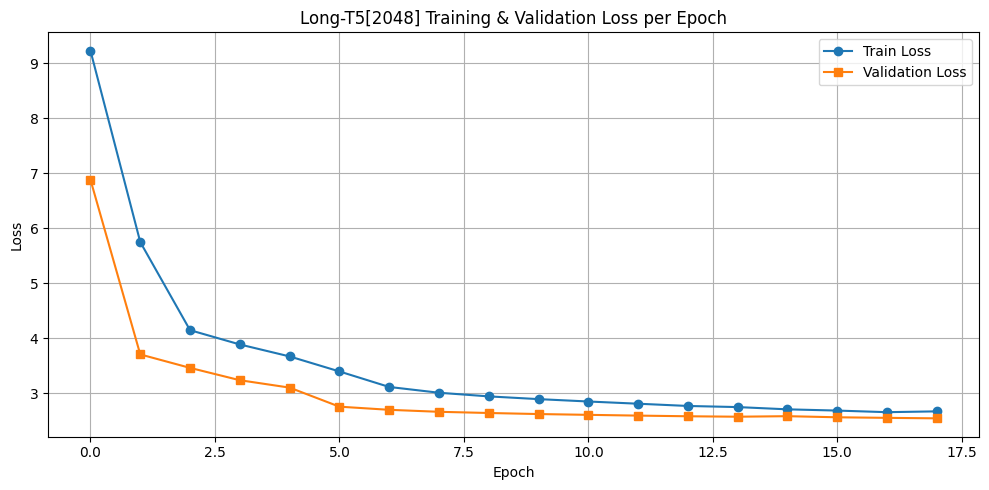

In [ ]:
# import matplotlib.pyplot as plt

# plt.figure(figsize=(10, 5))
# plt.plot(train_losses, label='Train Loss', marker='o')
# plt.plot(val_losses, label='Validation Loss', marker='s')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.title('Long-T5[2048] Training & Validation Loss per Epoch')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()

In [ ]:
# import torch
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
# finetuned_weights_path = "longt5_finetuned_using.pth"

# # load_state_dict()로 모델 가중치 반영
# state_dict = torch.load(finetuned_weights_path, map_location=device)
# model.load_state_dict(state_dict)

# model.eval()  # 평가 모드

# # 4) 테스트할 입력 텍스트 예시
# sample_input_text = ["""
#     Hugging Face: Revolutionizing Natural Language Processing
# Introduction
# In the rapidly evolving field of Natural Language Processing (NLP), Hugging Face has emerged as a prominent and innovative force. This article will explore the story and significance of Hugging Face, a company that has made remarkable contributions to NLP and AI as a whole. From its inception to its role in democratizing AI, Hugging Face has left an indelible mark on the industry.
# The Birth of Hugging Face
# Hugging Face was founded in 2016 by Clément Delangue, Julien Chaumond, and Thomas Wolf. The name "Hugging Face" was chosen to reflect the company's mission of making AI models more accessible and friendly to humans, much like a comforting hug. Initially, they began as a chatbot company but later shifted their focus to NLP, driven by their belief in the transformative potential of this technology.
# Transformative Innovations
# Hugging Face is best known for its open-source contributions, particularly the "Transformers" library. This library has become the de facto standard for NLP and enables researchers, developers, and organizations to easily access and utilize state-of-the-art pre-trained language models, such as BERT, GPT-3, and more. These models have countless applications, from chatbots and virtual assistants to language translation and sentiment analysis.
# Key Contributions:
# 1. **Transformers Library:** The Transformers library provides a unified interface for more than 50 pre-trained models, simplifying the development of NLP applications. It allows users to fine-tune these models for specific tasks, making it accessible to a wider audience.
# 2. **Model Hub:** Hugging Face's Model Hub is a treasure trove of pre-trained models, making it simple for anyone to access, experiment with, and fine-tune models. Researchers and developers around the world can collaborate and share their models through this platform.
# 3. **Hugging Face Transformers Community:** Hugging Face has fostered a vibrant online community where developers, researchers, and AI enthusiasts can share their knowledge, code, and insights. This collaborative spirit has accelerated the growth of NLP.
# Democratizing AI
# Hugging Face's most significant impact has been the democratization of AI and NLP. Their commitment to open-source development has made powerful AI models accessible to individuals, startups, and established organizations. This approach contrasts with the traditional proprietary AI model market, which often limits access to those with substantial resources.
# By providing open-source models and tools, Hugging Face has empowered a diverse array of users to innovate and create their own NLP applications. This shift has fostered inclusivity, allowing a broader range of voices to contribute to AI research and development.
# Industry Adoption
# The success and impact of Hugging Face are evident in its widespread adoption. Numerous companies and institutions, from startups to tech giants, leverage Hugging Face's technology for their AI applications. This includes industries as varied as healthcare, finance, and entertainment, showcasing the versatility of NLP and Hugging Face's contributions.
# Future Directions
# Hugging Face's journey is far from over. As of my last knowledge update in September 2021, the company was actively pursuing research into ethical AI, bias reduction in models, and more. Given their track record of innovation and commitment to the AI community, it is likely that they will continue to lead in ethical AI development and promote responsible use of NLP technologies.
# Conclusion
# Hugging Face's story is one of transformation, collaboration, and empowerment. Their open-source contributions have reshaped the NLP landscape and democratized access to AI. As they continue to push the boundaries of AI research, we can expect Hugging Face to remain at the forefront of innovation, contributing to a more inclusive and ethical AI future. Their journey reminds us that the power of open-source collaboration can lead to groundbreaking advancements in technology and bring AI within the reach of many.
#  """
# ]

# # 5) 토크나이징
# inputs = tokenizer(
#     sample_input_text,
#     return_tensors="pt",
#     max_length=4096,   # 학습 시 사용했던 입력 길이에 맞추거나 필요에 따라 조정
#     truncation=True
# ).to(device)

# # 6) 모델 생성 (generate)
# with torch.no_grad():
#     generated_ids = model.generate(
#         **inputs,
#         max_new_tokens=1024,       # 생성 최대 길이
#         repetition_penalty=2,   # 반복 줄이기 (1.0보다 크면 반복 감소)
#         no_repeat_ngram_size=3,   # 3-gram 반복 방지
#         early_stopping=True,      # 더 이상 유의미한 생성이 없으면 조기 종료
#         num_beams=5 # 등 빔서치 옵션도 가능
#         # do_sample=True 등 샘플링 옵션도 가능
#     )

# # 7) 디코딩
# generated_text = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)

# print("=== Input ===")
# print(sample_input_text[0])
# print("\n=== Model Output (Summary or Translation) ===")
# print(generated_text[0])

=== Input ===

    Hugging Face: Revolutionizing Natural Language Processing
Introduction
In the rapidly evolving field of Natural Language Processing (NLP), Hugging Face has emerged as a prominent and innovative force. This article will explore the story and significance of Hugging Face, a company that has made remarkable contributions to NLP and AI as a whole. From its inception to its role in democratizing AI, Hugging Face has left an indelible mark on the industry.
The Birth of Hugging Face
Hugging Face was founded in 2016 by Clément Delangue, Julien Chaumond, and Thomas Wolf. The name "Hugging Face" was chosen to reflect the company's mission of making AI models more accessible and friendly to humans, much like a comforting hug. Initially, they began as a chatbot company but later shifted their focus to NLP, driven by their belief in the transformative potential of this technology.
Transformative Innovations
Hugging Face is best known for its open-source contributions, particularl